In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
def plot_mean_se(y, y_lower, y_upper, color="black", alpha=1, label="", line_width=4):
    x = np.arange(1, len(y)+1)
    plt.plot(x, y, color=color, label=label, linewidth=line_width)
    plt.fill_between(x, y_lower, y_upper, alpha=alpha, color=color)

In [3]:
four_df = pd.read_csv("in/results_fourrooms_srs.csv")
pin_df = pd.read_csv("in/results_pinball_srs.csv")
pick_df = pd.read_csv("in/results_pick_and_place.csv")
m2s_pick_df = pd.read_csv("in/results_m2s_pick_and_place_srs.csv")
crowd_nav_df = pd.read_csv("in/results_crowd_nav.csv")
crowd_nav_rw_df = pd.read_csv("in/results_crowd_nav_rw.csv")
crowd_nav_opp_df = pd.read_csv("in/results_crowd_nav_opp.csv")
crowd_nav_opp_rw_df = pd.read_csv("in/results_crowd_nav_opp_rw.csv")

In [6]:
four_df.head()

,HRS-mean,HRS-se,HRS-upper,HRS-lower,RRS-mean,RRS-se,RRS-upper,RRS-lower,SARSA-mean,SARSA-se,...,SARSA-RS-upper,SARSA-RS-lower,HRS-init-mean,HRS-init-se,HRS-init-upper,HRS-init-lower,RRS-init-mean,RRS-init-se,RRS-init-upper,RRS-init-lower
0,630.5680,3.021048,633.589048,627.546952,733.2386,2.769005,736.007605,730.469595,732.87,29.561874,...,747.584911,729.219089,688.074,8.608404,696.682404,679.465596,699.354,8.300266,707.654266,691.053734
1,643.1080,3.228438,646.336438,639.879562,728.6272,2.939504,731.566704,725.687696,778.19,26.575312,...,726.266770,708.161230,724.128,9.071442,733.199442,715.056558,682.739,8.959411,691.698411,673.779589
2,624.3888,3.036729,627.425529,621.352071,617.0592,3.051279,620.110479,614.007921,657.71,30.314317,...,544.545391,525.906609,643.837,9.643665,653.480665,634.193335,649.448,9.420887,658.868887,640.027113
3,620.0154,3.118000,623.133400,616.897400,585.3476,3.102625,588.450225,582.244975,667.13,29.800236,...,492.663678,474.740322,596.097,9.421033,605.518033,586.675967,595.665,9.645002,605.310002,586.019998
4,615.8460,3.195490,619.041490,612.650510,598.8777,3.097700,601.975400,595.780000,692.75,32.008384,...,371.968235,355.921765,530.049,9.741092,539.790092,520.307908,544.504,9.627735,554.131735,534.876265


In [7]:
pin_df.keys()

Index(['Unnamed: 0', 'AC-mean', 'AC-10_moving_average', 'AC-se', 'AC-upper',
       'AC-lower', 'HRS-mean', 'HRS-10_moving_average', 'HRS-se', 'HRS-upper',
       'HRS-lower', 'RRS-mean', 'RRS-10_moving_average', 'RRS-se', 'RRS-upper',
       'RRS-lower', 'NRS-mean', 'NRS-10_moving', 'NRS-se', 'NRS-upper',
       'NRS-lower', 'SARSA-RS-mean', 'SARSA-RS-se', 'SARSA-RS-10_moving',
       'SARSA-RS-upper', 'SARSA-RS-lower'],
      dtype='object')

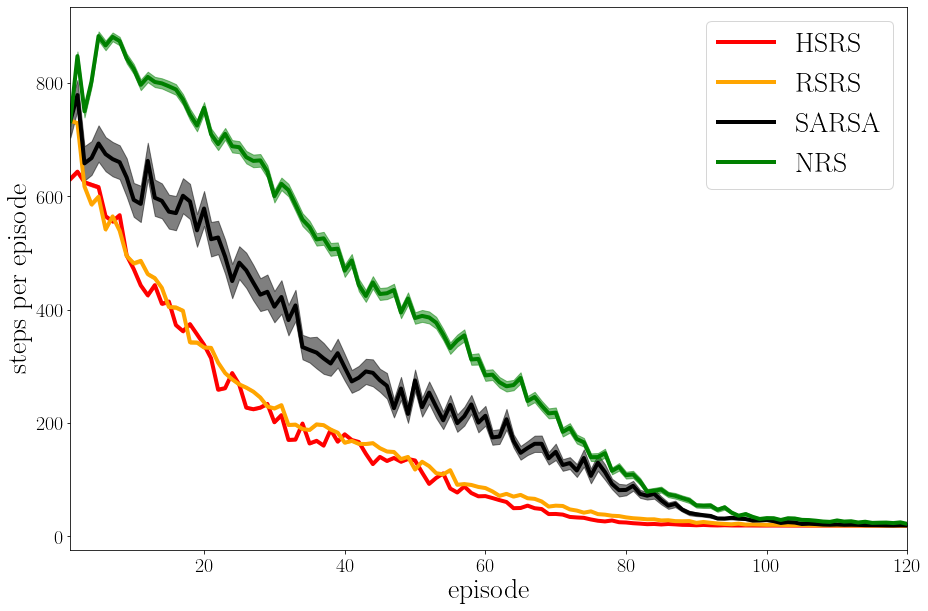

In [8]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(four_df["HRS-mean"][:l_episodes], four_df["HRS-lower"][:l_episodes], four_df["HRS-upper"][:l_episodes], "red", 0.5, "HSRS")
# plot_mean_se(four_df["HRS-init-mean"][:l_episodes], four_df["HRS-init-lower"][:l_episodes], four_df["HRS-init-upper"][:l_episodes], "cyan", 0.5, "HRS-init")
plot_mean_se(four_df["RRS-mean"][:l_episodes], four_df["RRS-lower"][:l_episodes], four_df["RRS-upper"][:l_episodes], "orange", 0.5, "RSRS")
# plot_mean_se(four_df["RRS-init-mean"][:l_episodes], four_df["RRS-init-lower"][:l_episodes], four_df["RRS-init-upper"][:l_episodes], "magenta", 0.5, "RRS-init")
plot_mean_se(four_df["SARSA-mean"][:l_episodes], four_df["SARSA-lower"][:l_episodes], four_df["SARSA-upper"][:l_episodes], "black", 0.5, "SARSA")
plot_mean_se(four_df["NRS-mean"][:l_episodes], four_df["NRS-lower"][:l_episodes], four_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(four_df["SARSA-RS-mean"][:l_episodes], four_df["SARSA-RS-lower"][:l_episodes], four_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/4rooms-learning-curves.pdf", format="pdf")

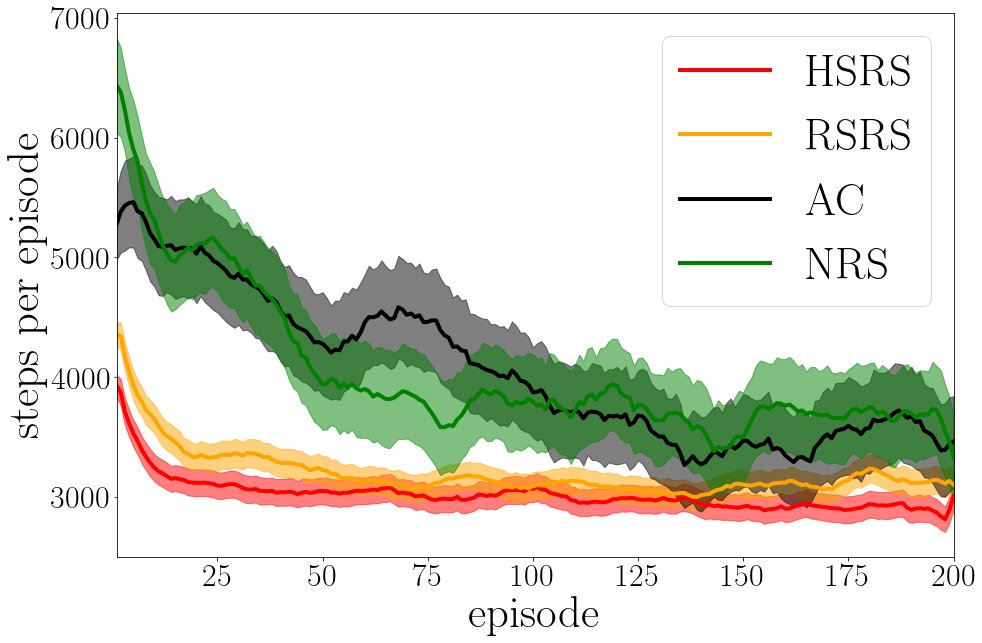

In [9]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(pin_df["HRS-10_moving_average"][:l_episodes], pin_df["HRS-lower"][:l_episodes], pin_df["HRS-upper"][:l_episodes], "red", 0.5, "HSRS")
plot_mean_se(pin_df["RRS-10_moving_average"][:l_episodes], pin_df["RRS-lower"][:l_episodes], pin_df["RRS-upper"][:l_episodes], "orange", 0.5, "RSRS")
plot_mean_se(pin_df["AC-10_moving_average"][:l_episodes], pin_df["AC-lower"][:l_episodes], pin_df["AC-upper"][:l_episodes], "black", 0.5, "AC") # dimgray
plot_mean_se(pin_df["NRS-10_moving"][:l_episodes], pin_df["NRS-lower"][:l_episodes], pin_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pin_df["SARSA-RS-10_moving"][:l_episodes], pin_df["SARSA-RS-lower"][:l_episodes], pin_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("steps per episode", fontsize=45)
plt.xlabel("episode", fontsize=45)
plt.xlim(1, l_episodes)
plt.legend(fontsize=45)
plt.tick_params(labelsize=32)
plt.savefig("out/pinball-learning-curves.pdf", format="pdf")
# plt.plot()

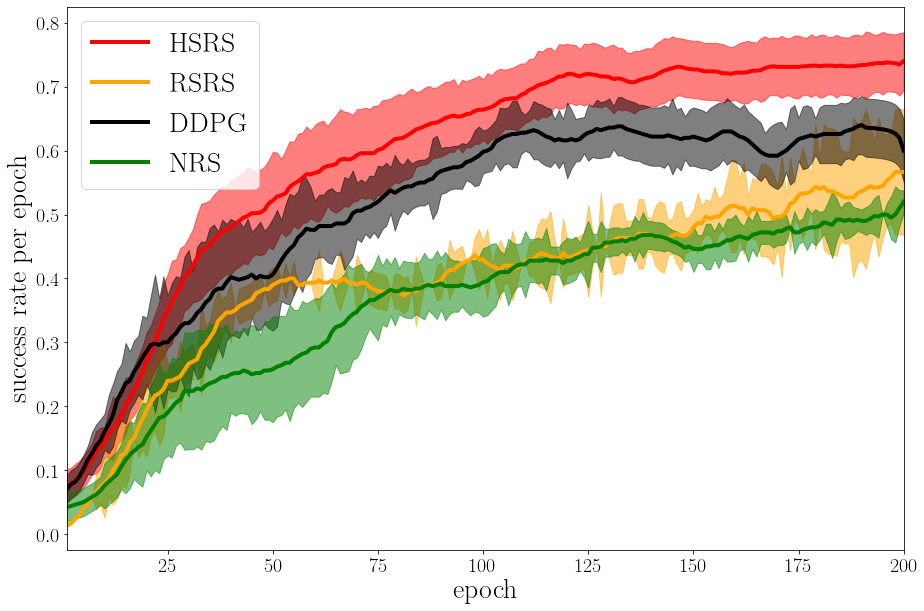

In [9]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(m2s_pick_df["HRS-mv"][:l_episodes], m2s_pick_df["HRS-lower"][:l_episodes], m2s_pick_df["HRS-upper"][:l_episodes], "red", 0.5, "HSRS")
plot_mean_se(m2s_pick_df["RRS-mv"][:l_episodes], m2s_pick_df["RRS-lower"][:l_episodes], m2s_pick_df["RRS-upper"][:l_episodes], "orange", 0.5, "RSRS")
plot_mean_se(m2s_pick_df["DDPG-mv"][:l_episodes], m2s_pick_df["DDPG-lower"][:l_episodes], m2s_pick_df["DDPG-upper"][:l_episodes], "black", 0.5, "DDPG")
plot_mean_se(m2s_pick_df["NRS-mv"][:l_episodes], m2s_pick_df["NRS-lower"][:l_episodes], m2s_pick_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/m2s_robotics-learning-curves.pdf", format="pdf")

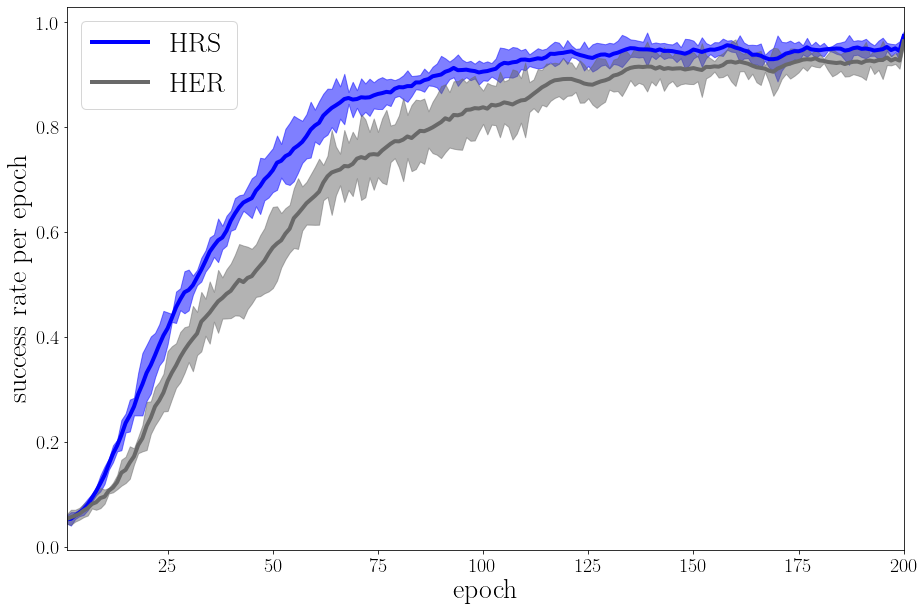

In [10]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(pick_df["HRS-mv"][:l_episodes], pick_df["HRS-lower"][:l_episodes], pick_df["HRS-upper"][:l_episodes], "blue", 0.5, "HRS")
plot_mean_se(pick_df["HER-mv"][:l_episodes], pick_df["HER-lower"][:l_episodes], pick_df["HER-upper"][:l_episodes], "dimgray", 0.5, "HER")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/robotics-learning-curves.pdf", format="pdf")

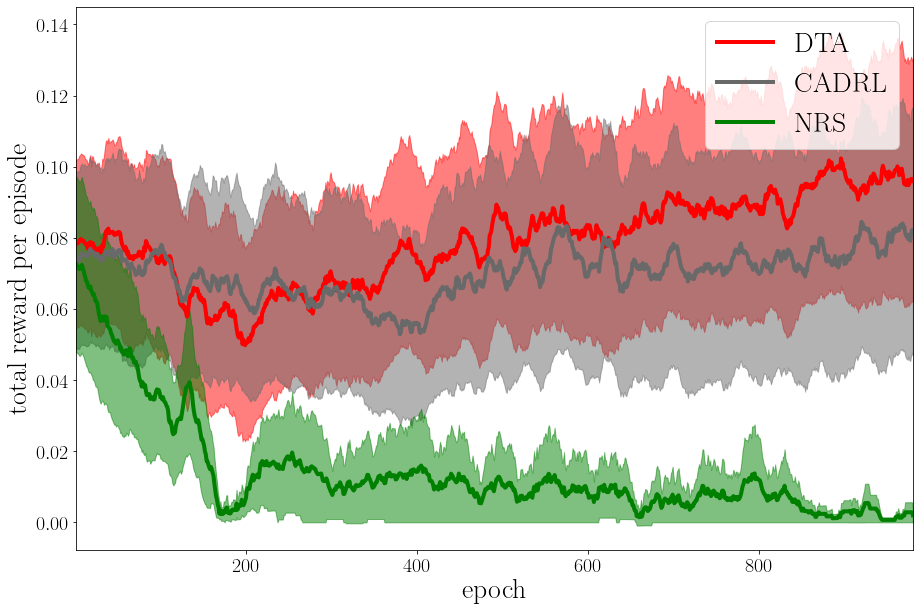

In [11]:
l_episodes = 980
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(crowd_nav_rw_df["DTA-mean"][:l_episodes], crowd_nav_rw_df["DTA-lower"][:l_episodes], crowd_nav_rw_df["DTA-upper"][:l_episodes], "red", 0.5, "DTA")
plot_mean_se(crowd_nav_rw_df["CADRL-mean"][:l_episodes], crowd_nav_rw_df["CADRL-lower"][:l_episodes], crowd_nav_rw_df["CADRL-upper"][:l_episodes], "dimgray", 0.5, "CADRL")
plot_mean_se(crowd_nav_rw_df["NRS-mean"][:l_episodes], crowd_nav_rw_df["NRS-lower"][:l_episodes], crowd_nav_rw_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("total reward per episode", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/crowd_nav-reward-learning-curves.pdf", format="pdf")

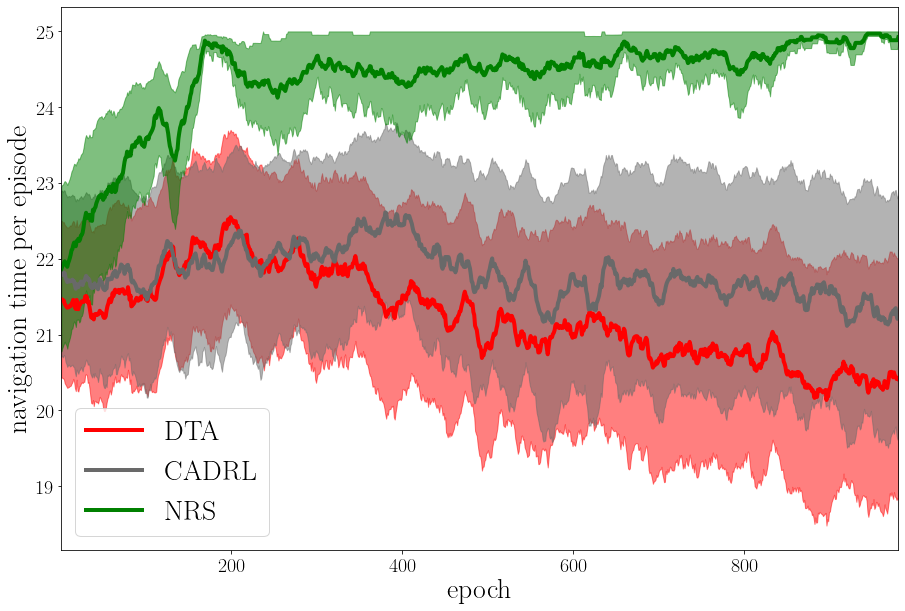

In [12]:
l_episodes = 980
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(crowd_nav_df["DTA-mean"][:l_episodes], crowd_nav_df["DTA-lower"][:l_episodes], crowd_nav_df["DTA-upper"][:l_episodes], "red", 0.5, "DTA")
plot_mean_se(crowd_nav_df["CADRL-mean"][:l_episodes], crowd_nav_df["CADRL-lower"][:l_episodes], crowd_nav_df["CADRL-upper"][:l_episodes], "dimgray", 0.5, "CADRL")
plot_mean_se(crowd_nav_df["NRS-mean"][:l_episodes], crowd_nav_df["NRS-lower"][:l_episodes], crowd_nav_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("navigation time per episode", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/crowd_nav-nav_time-learning-curves.pdf", format="pdf")

# SRSとDTAの比較

In [10]:
comp_four_df = pd.read_csv("in/results_fourrooms_srs_dta.csv")
comp_pin_df = pd.read_csv("in/results_pinball_srs_dta.csv")
comp_pick_df = pd.read_csv("in/results_m2s_pick_and_place_srs_dta.csv")

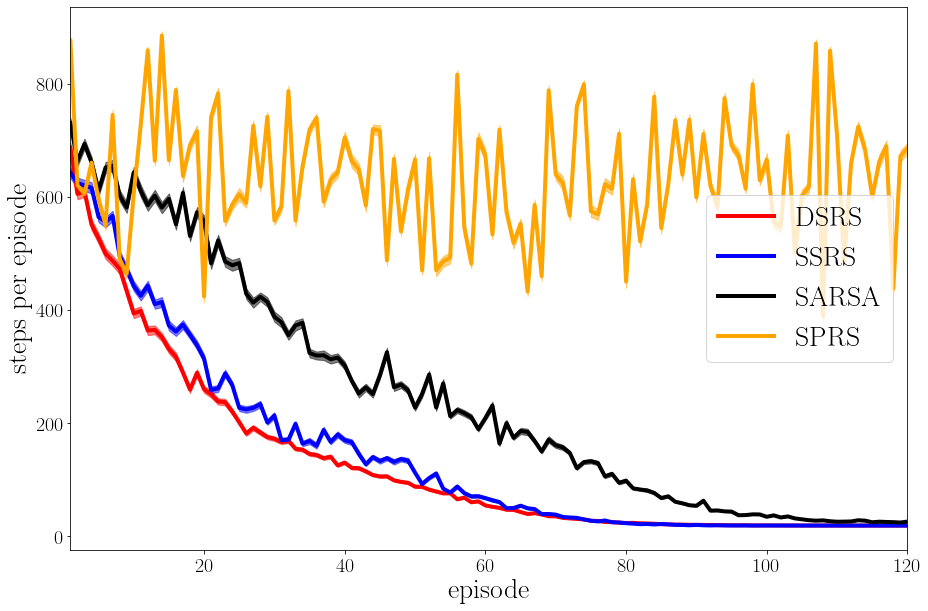

In [12]:
l_episodes = 120
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_four_df["DTA-mean"][:l_episodes], comp_four_df["DTA-lower"][:l_episodes], comp_four_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_four_df["SRS-mean"][:l_episodes], comp_four_df["SRS-lower"][:l_episodes], comp_four_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_four_df["SARSA-mean"][:l_episodes], comp_four_df["SARSA-lower"][:l_episodes], comp_four_df["SARSA-upper"][:l_episodes], "black", 0.5, "SARSA")
# plot_mean_se(comp_four_df["NRS-mean"][:l_episodes], comp_four_df["NRS-lower"][:l_episodes], comp_four_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_four_df["SPRS-mean"][:l_episodes], comp_four_df["SPRS-lower"][:l_episodes], comp_four_df["SPRS-upper"][:l_episodes], "orange", 0.5, "SPRS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.plot()
plt.savefig("out/comp-4rooms-learning-curves.pdf", format="pdf")
plt.savefig("out/comp-4rooms-learning-curves.png", format="png")

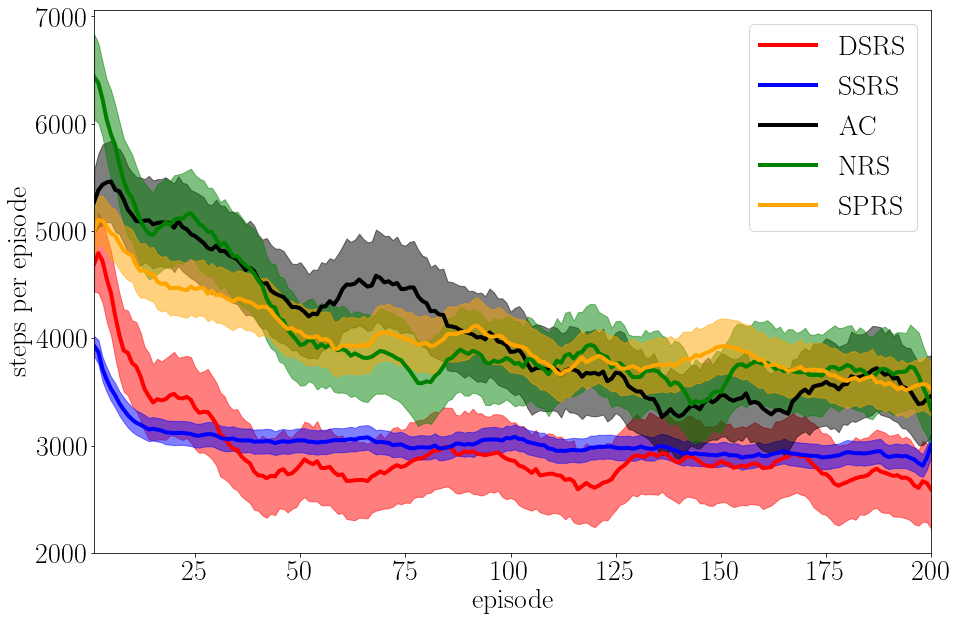

In [14]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pin_df["DTA-10_moving_average"][:l_episodes], comp_pin_df["DTA-lower"][:l_episodes], comp_pin_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pin_df["SRS-10_moving_average"][:l_episodes], comp_pin_df["SRS-lower"][:l_episodes], comp_pin_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_pin_df["AC-10_moving_average"][:l_episodes], comp_pin_df["AC-lower"][:l_episodes], comp_pin_df["AC-upper"][:l_episodes], "black", 0.5, "AC")
plot_mean_se(comp_pin_df["NRS-10_moving"][:l_episodes], comp_pin_df["NRS-lower"][:l_episodes], comp_pin_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_pin_df["SPRS-10_moving"][:l_episodes], comp_pin_df["SPRS-lower"][:l_episodes], comp_pin_df["SPRS-upper"][:l_episodes], "orange", 0.5, "SPRS")
plt.ylabel("steps per episode", fontsize=28)
plt.xlabel("episode", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.tick_params(labelsize=28)
plt.savefig("out/comp-pinball-learning-curves.pdf", format="pdf")
plt.savefig("out/comp-pinball-learning-curves.png", format="png")

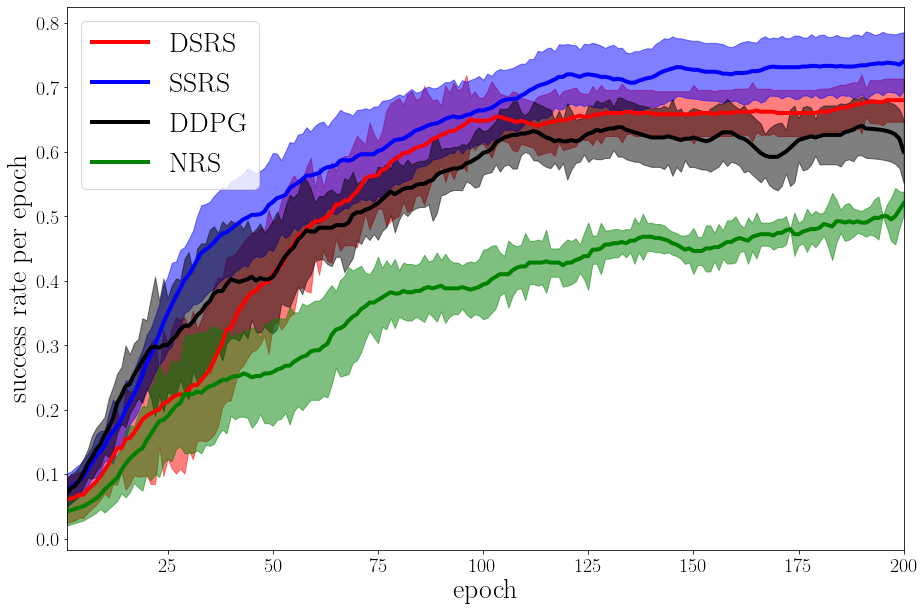

In [11]:
l_episodes = 200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pick_df["DTA-mv"][:l_episodes], comp_pick_df["DTA-lower"][:l_episodes], comp_pick_df["DTA-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pick_df["SRS-mv"][:l_episodes], comp_pick_df["SRS-lower"][:l_episodes], comp_pick_df["SRS-upper"][:l_episodes], "blue", 0.5, "SSRS")
plot_mean_se(comp_pick_df["DDPG-mv"][:l_episodes], comp_pick_df["DDPG-lower"][:l_episodes], comp_pick_df["DDPG-upper"][:l_episodes], "black", 0.5, "DDPG")
plot_mean_se(comp_pick_df["NRS-mv"][:l_episodes], comp_pick_df["NRS-lower"][:l_episodes], comp_pick_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
# plot_mean_se(pick_df["SARSA-RS-mv"][:l_episodes], pick_df["SARSA-RS-lower"][:l_episodes], pick_df["SARSA-RS-upper"][:l_episodes], "red", 0.5, "SARSA-RS")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/comp-m2s_robotics-learning-curves.pdf", format="pdf")

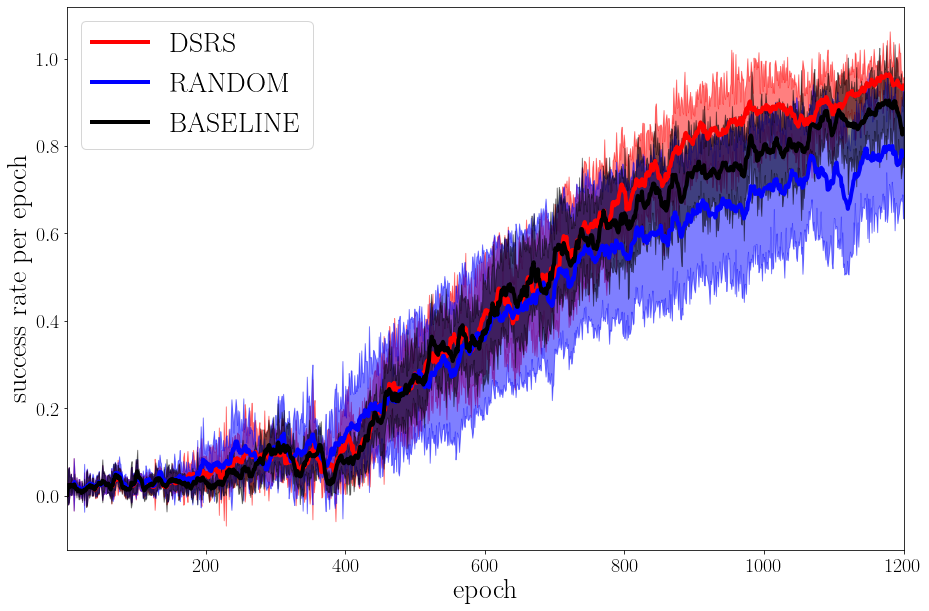

In [19]:
comp_pick_df = pd.read_csv("/home/tokudo/Develop/research/analyze_result/pick_and_place/out/learning_curve.csv")
l_episodes = 1200
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=20)
plot_mean_se(comp_pick_df["DSRS-mv"][:l_episodes], comp_pick_df["DSRS-lower"][:l_episodes], comp_pick_df["DSRS-upper"][:l_episodes], "red", 0.5, "DSRS")
plot_mean_se(comp_pick_df["Random-mv"][:l_episodes], comp_pick_df["Random-lower"][:l_episodes], comp_pick_df["Random-upper"][:l_episodes], "blue", 0.5, "RANDOM")
# plot_mean_se(comp_pick_df["DDPG-mv"][:l_episodes], comp_pick_df["DDPG-lower"][:l_episodes], comp_pick_df["DDPG-upper"][:l_episodes], "black", 0.5, "DDPG")
# plot_mean_se(comp_pick_df["NRS-mean"][:l_episodes], comp_pick_df["NRS-lower"][:l_episodes], comp_pick_df["NRS-upper"][:l_episodes], "green", 0.5, "NRS")
plot_mean_se(comp_pick_df["BASELINE-mv"][:l_episodes], comp_pick_df["BASELINE-lower"][:l_episodes], comp_pick_df["BASELINE-upper"][:l_episodes], "black", 0.5, "BASELINE")
plt.ylabel("success rate per epoch", fontsize=28)
plt.xlabel("epoch", fontsize=28)
plt.xlim(1, l_episodes)
plt.legend(fontsize=28)
plt.savefig("out/fixed_subgs-m2s_robotics-learning-curves.pdf", format="pdf")
plt.savefig("out/fixed_subgs-m2s_robotics-learning-curves.png", format="png")